In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Load the dataset
df = pd.read_csv("high_diamond_ranked_10min.csv")

# Print basic info
print(f"Dataset shape: {df.shape}")
print(f"Columns ({len(df.columns)} total): {df.columns.tolist()}")


Dataset shape: (9879, 40)
Columns (40 total): ['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Prepare features and target
X = df.drop(['gameId', 'blueWins'], axis=1)
y = df['blueWins']

# Handle missing values by filling with zero (no missing values expected)
X = X.fillna(0)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Define baseline models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Evaluate each model
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba)
    })

# Display performance results
results_df = pd.DataFrame(results)
print(results_df)


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  Accuracy  F1 Score   ROC AUC
0  Logistic Regression  0.719636  0.720484  0.806189
1        Random Forest  0.717105  0.713186  0.799490


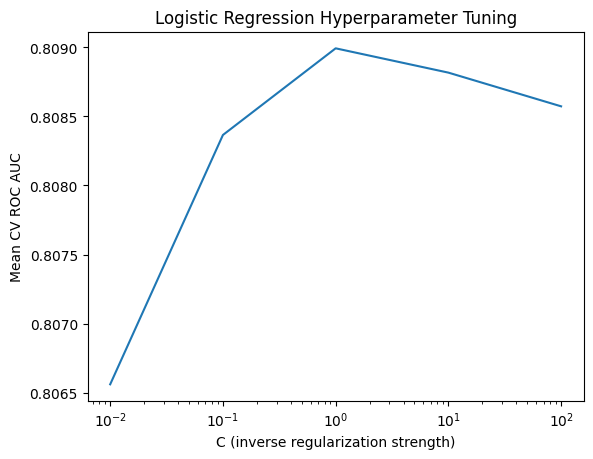

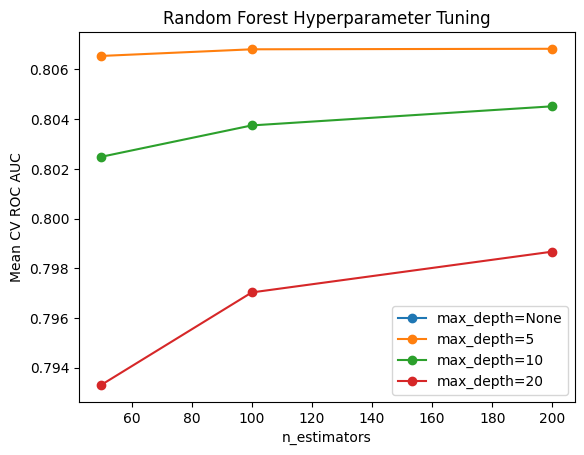

Logistic Regression best params: {'C': 1} – CV ROC AUC: 0.808991839320567
Random Forest best params: {'max_depth': 5, 'n_estimators': 200} – CV ROC AUC: 0.8068288904090839


In [4]:



# 2. 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 3. Logistic Regression 
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}
lr = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
grid_lr = GridSearchCV(lr, param_grid_lr, cv=cv, scoring='roc_auc')
grid_lr.fit(X, y)

# plot:ROC AUC 
plt.figure()
plt.semilogx(param_grid_lr['C'], grid_lr.cv_results_['mean_test_score'])
plt.xlabel('C (inverse regularization strength)')
plt.ylabel('Mean CV ROC AUC')
plt.title('Logistic Regression Hyperparameter Tuning')
plt.show()

# 4. Random Forest 
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth':    [None, 5, 10, 20]
}
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=cv, scoring='roc_auc')
grid_rf.fit(X, y)

# plot： max_depth and ROC AUC(n_estimators )
import numpy as np
results_rf = pd.DataFrame(grid_rf.cv_results_)
plt.figure()
for depth in [None, 5, 10, 20]:
    mask = results_rf['param_max_depth'] == depth
    ne = results_rf.loc[mask, 'param_n_estimators'].astype(int)
    sc = results_rf.loc[mask, 'mean_test_score']
    plt.plot(ne, sc, marker='o', label=f'max_depth={depth}')
plt.xlabel('n_estimators')
plt.ylabel('Mean CV ROC AUC')
plt.title('Random Forest Hyperparameter Tuning')
plt.legend()
plt.show()

# 5. CV ROC AUC
print("Logistic Regression best params:", grid_lr.best_params_,
      "– CV ROC AUC:", grid_lr.best_score_)
print("Random Forest best params:", grid_rf.best_params_,
      "– CV ROC AUC:", grid_rf.best_score_)


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\training.py:183: UserWarning: [18:14:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


            Model  Accuracy  F1 Score   ROC AUC
0         XGBoost  0.697368  0.695519  0.778896
1             SVM  0.719636  0.716769  0.801293
2  Neural Network  0.644231  0.726566  0.742852


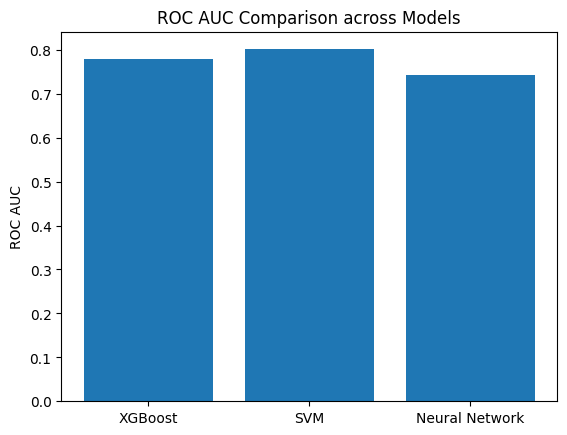

In [5]:



# 2. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# 3. 
models = {
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42)
}

# 4. 
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba)
    })
results_df = pd.DataFrame(results)

# 5. 
print(results_df)

# 6. plot: ROC AUC comparsion
plt.figure()
plt.bar(results_df['Model'], results_df['ROC AUC'])
plt.ylabel('ROC AUC')
plt.title('ROC AUC Comparison across Models')
plt.show()


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\training.py:183: UserWarning: [18:14:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


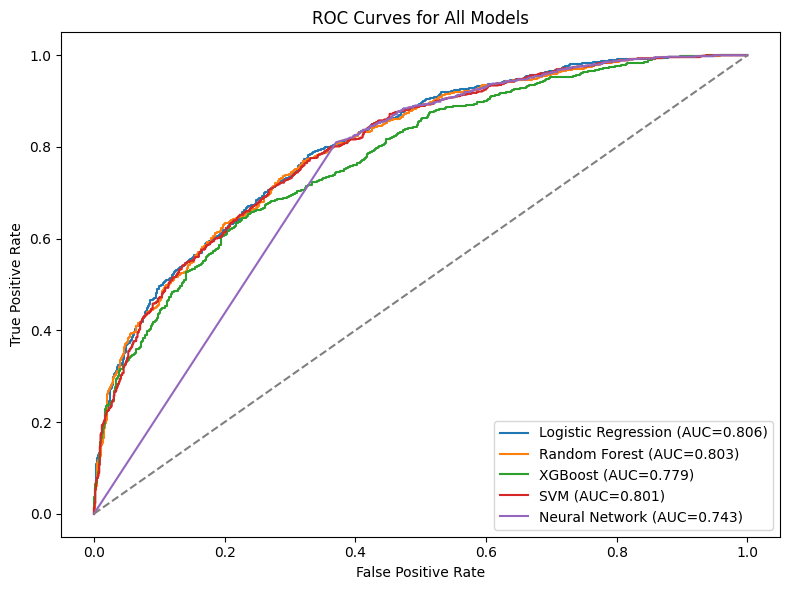

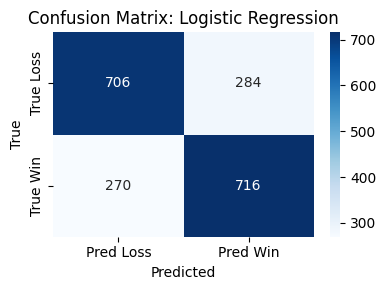

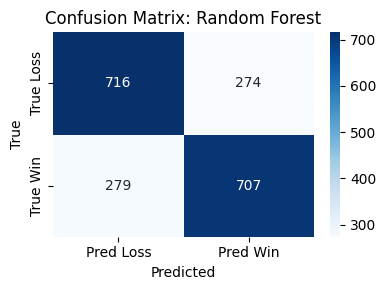

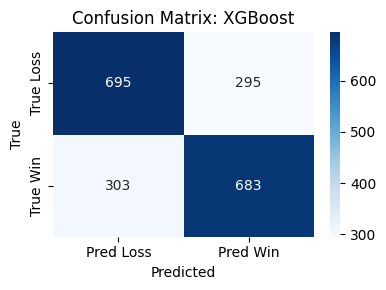

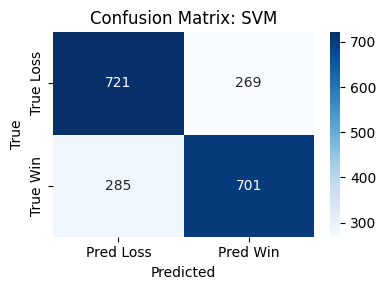

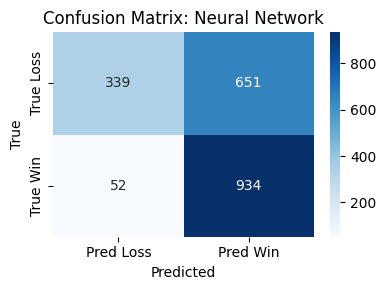

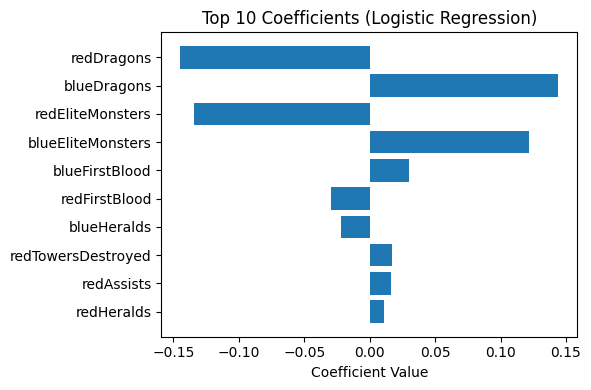

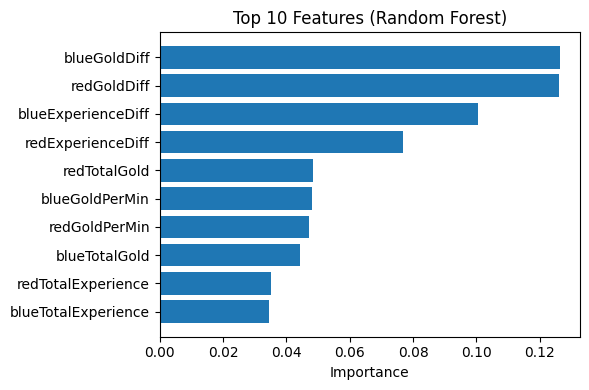

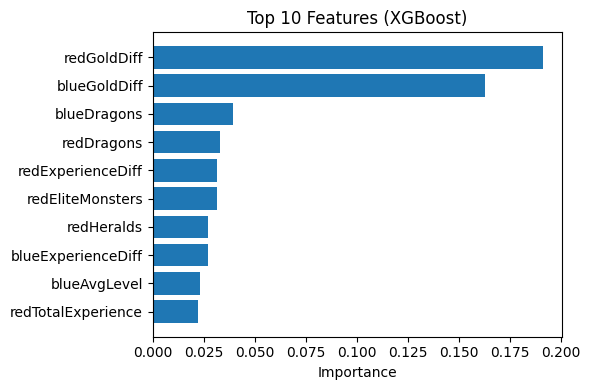

In [6]:
# 1. 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# 2. 5 models
models = {
    'Logistic Regression': LogisticRegression(C=0.1, solver='liblinear', max_iter=500),
    'Random Forest':      RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    'XGBoost':            XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'SVM':                SVC(probability=True, random_state=42),
    'Neural Network':     MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42)
}

# 3. training models
roc_data = {}
cm_data = {}
coefs_lr = None
imp_rf, imp_xgb = None, None

for name, mdl in models.items():
    mdl.fit(X_train, y_train)
    y_proba = mdl.predict_proba(X_test)[:,1]
    y_pred  = mdl.predict(X_test)
    
    # ROC 
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_data[name] = {'fpr':fpr, 'tpr':tpr, 'auc':auc(fpr, tpr)}
    
    # matrix
    cm_data[name] = confusion_matrix(y_test, y_pred)
    
    #  LR and RF/XGB
    if name == 'Logistic Regression':
        coefs_lr = mdl.coef_[0]
    if name == 'Random Forest':
        imp_rf = mdl.feature_importances_
    if name == 'XGBoost':
        imp_xgb = mdl.feature_importances_

# 4. all model ROC comparsion
plt.figure(figsize=(8,6))
for name, d in roc_data.items():
    plt.plot(d['fpr'], d['tpr'], label=f"{name} (AUC={d['auc']:.3f})")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right'); plt.tight_layout(); plt.show()

# 5. all matric
for name, cm in cm_data.items():
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Pred Loss','Pred Win'],
                yticklabels=['True Loss','True Win'])
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted'); plt.ylabel('True')
    plt.tight_layout(); plt.show()

# 6. Logistic
idx_lr = np.argsort(np.abs(coefs_lr))[-10:]
plt.figure(figsize=(6,4))
plt.barh(range(len(idx_lr)), coefs_lr[idx_lr], align='center')
plt.yticks(range(len(idx_lr)), [X.columns[i] for i in idx_lr])
plt.xlabel('Coefficient Value'); plt.title('Top 10 Coefficients (Logistic Regression)')
plt.tight_layout(); plt.show()

#  7. RF & XGBoost
for imp, title in [(imp_rf, 'Random Forest'), (imp_xgb, 'XGBoost')]:
    idx = np.argsort(imp)[-10:]
    plt.figure(figsize=(6,4))
    plt.barh(range(len(idx)), imp[idx], align='center')
    plt.yticks(range(len(idx)), [X.columns[i] for i in idx])
    plt.xlabel('Importance'); plt.title(f'Top 10 Features ({title})')
    plt.tight_layout(); plt.show()
